# Importing Libraries and Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Standard Scaler
from sklearn.preprocessing import StandardScaler

### Regression 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor  
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn import tree

### Model Evaluation Metrices
from sklearn import metrics

sns.set_style('darkgrid')

In [0]:
cen = pd.read_csv('fulfilment_center_info.csv')
mel = pd.read_csv('meal_info.csv')
main = pd.read_csv('train.csv')

inner1 =  pd.merge(left=main ,right=cen, left_on='center_id', right_on='center_id')
mark0 = pd.merge(left=inner1 ,right=mel, left_on='meal_id', right_on='meal_id')
mark0.shape

(456548, 15)

# Forecasting

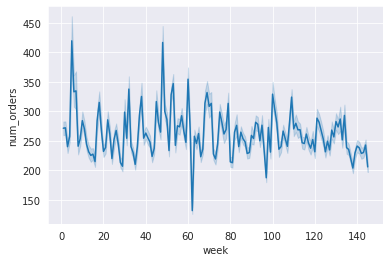

In [0]:
sns.lineplot(x='week',y='num_orders',data=mark0)

In [0]:
train= mark0[0:350000] 
test=mark0[350000:]

In [0]:
sns.set_style('darkgrid')

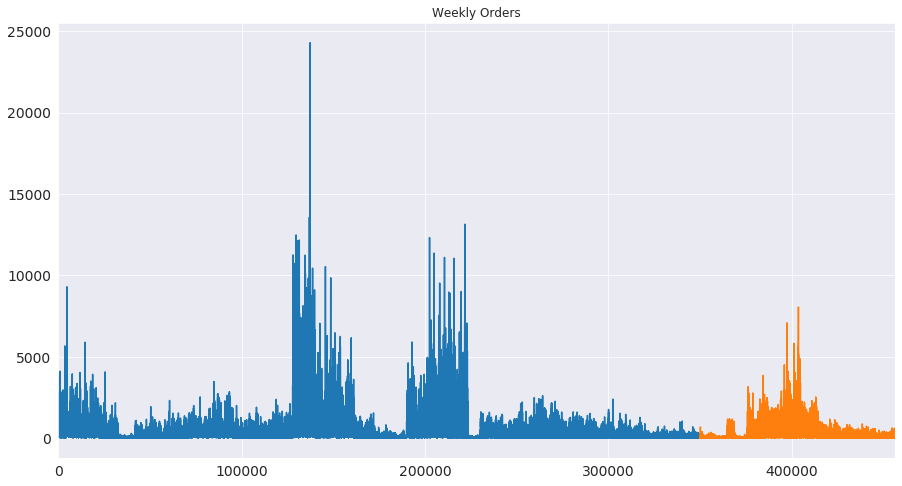

In [0]:
train.num_orders.plot(figsize=(15,8), title= 'Weekly Orders', fontsize=14, kind='line')
test.num_orders.plot(figsize=(15,8), title= 'Weekly Orders', fontsize=14, kind='line')
plt.show()

Text(0.5, 1.0, 'Weekly Orders')

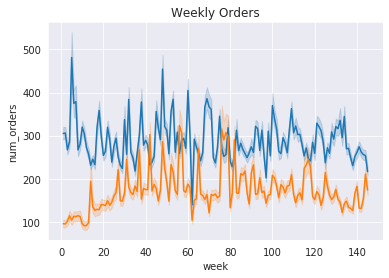

In [0]:
sns.lineplot(x='week',y='num_orders',data=train)
sns.lineplot(x='week',y='num_orders',data=test)
plt.title('Weekly Orders')

# Regression

## One Hot Encoding


In [0]:
mark0.head(1)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai


In [0]:
mark1 = mark0

In [0]:
mark1.drop(['id','center_id','meal_id','base_price','city_code','region_code','week'], axis=1,inplace=True)

In [0]:
mark1['emailer_for_promotion'] = mark1['emailer_for_promotion'].replace([0,1],['email_no','email_yes'])
mark1['homepage_featured'] = mark1['homepage_featured'].replace([0,1],['home_no','home_yes'])

hot = mark1[['emailer_for_promotion','homepage_featured','center_type','category','cuisine']]
dum = pd.get_dummies(hot,drop_first=True)

mark1.drop(['emailer_for_promotion','homepage_featured','center_type','category','cuisine'],axis=1,inplace=True)

mark1 = pd.concat([mark1, dum], axis=1)
mark1.head(1)

,checkout_price,num_orders,op_area,emailer_for_promotion_email_yes,homepage_featured_home_yes,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,136.83,177,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Test Train Split

In [0]:
foxtrot = mark1

In [0]:
X_train, X_test, y_train, y_test = train_test_split(foxtrot.drop('num_orders',axis=1), 
                                                    foxtrot['num_orders'], test_size=0.30, 
                                                    random_state=101)

## Linear Regression

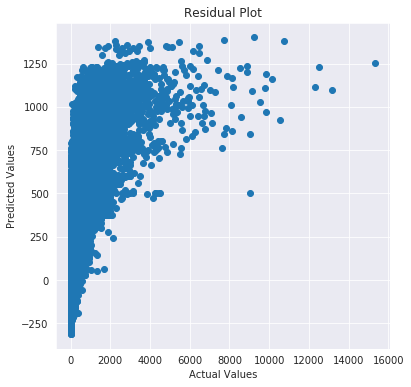

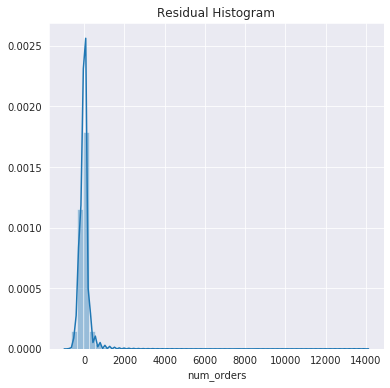



Regression Evaluation Metrices
Train Score: 0.41185460174926275
Test Score: 0.39613779811565253
MAE: 161.61015806720732
MSE: 96198.84116814689
RMSE: 310.1593802678663


In [0]:
# Fitting the Model
lm = LinearRegression()
lm.fit(X_train,y_train)
# Predictions
predictions = lm.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=50)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('R square:', lm.r2_score(X_test,y_test))
print('Train Score:', lm.score(X_train,y_train))
print('Test Score:', lm.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Decision Tree Regressor

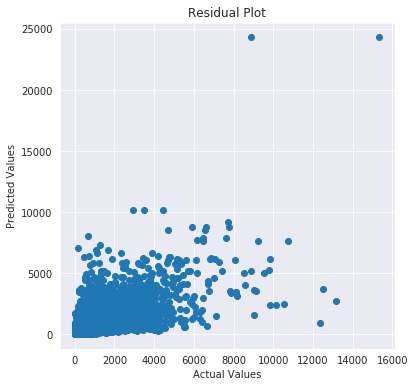

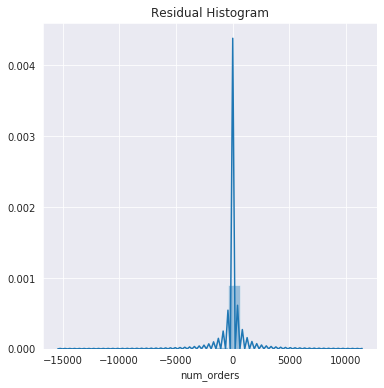



Regression Evaluation Metrices
Train Score: 0.9077897897661823
Test Score: 0.5944440658279503
MAE: 108.42416541200069
MSE: 64607.472987170775
RMSE: 254.18000115502946


In [0]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
# Predictions
predictions = regressor.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=25)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', regressor.score(X_train,y_train))
print('Test Score:', regressor.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Random Forest Regression

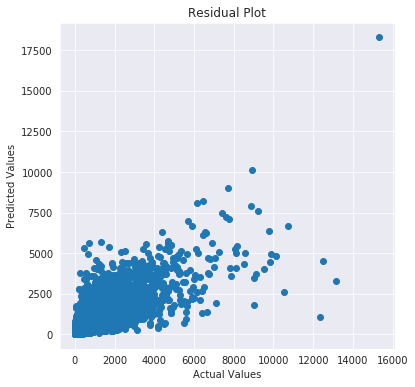

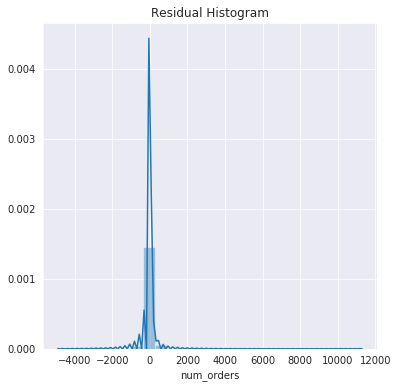



Regression Evaluation Metrices
Train Score: 0.8881484668843614
Test Score: 0.7035195856027887
MAE: 100.65052055203304
MSE: 47231.09379104026
RMSE: 217.3271584294983


In [0]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
# Predictions
predictions = rf.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=25)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', rf.score(X_train,y_train))
print('Test Score:', rf.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Lasso

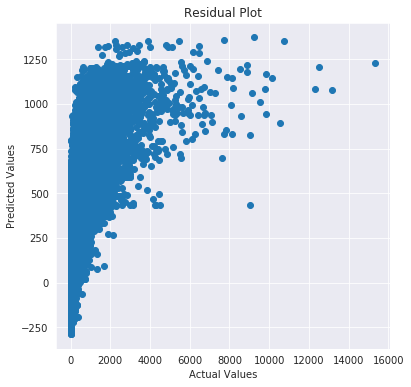

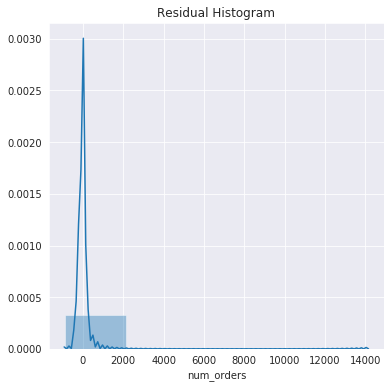



Regression Evaluation Metrices
Train Score: 0.4062922244542563
Test Score: 0.390320079073765
MAE: 160.84807858043402
MSE: 97125.63842143585
RMSE: 311.64986510736026


In [0]:
lasso = Lasso()
lasso.fit(X_train,y_train)
# Predictions
predictions = lasso.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=5)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', lasso.score(X_train,y_train))
print('Test Score:', lasso.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Bagging Regressor

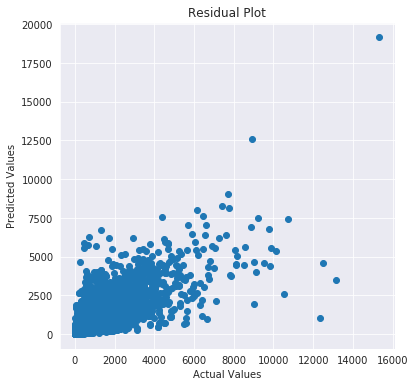

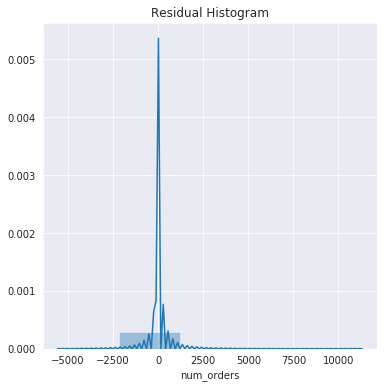



Regression Evaluation Metrices
Train Score: 0.878873733925051
Test Score: 0.6890053757294448
MAE: 102.16016555031985
MSE: 49543.29376966116
RMSE: 222.58322885981585


In [0]:
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=5)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', model.score(X_train,y_train))
print('Test Score:', model.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


## Ada Boost Regressor

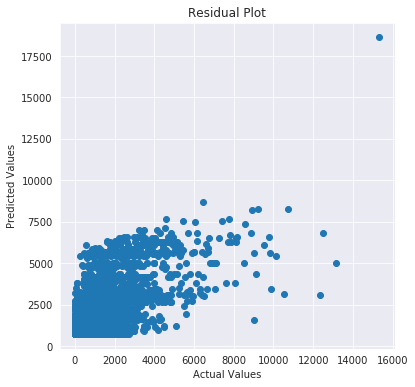

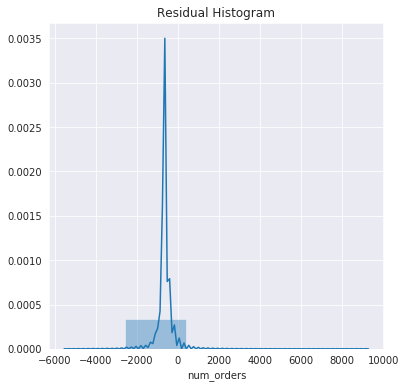



Regression Evaluation Metrices
Train Score: -2.5364852563809346
Test Score: -2.452050901158064
MAE: 667.0020472974891
MSE: 549932.2449866865
RMSE: 741.5741668819691


In [0]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=5)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', model.score(X_train,y_train))
print('Test Score:', model.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Gradient Boosting Regressor

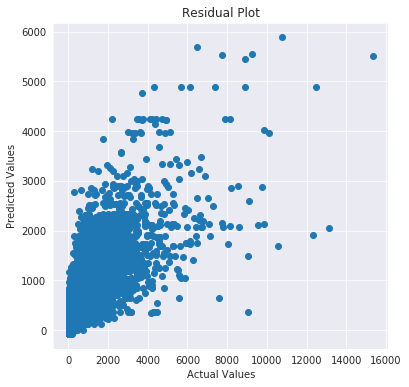

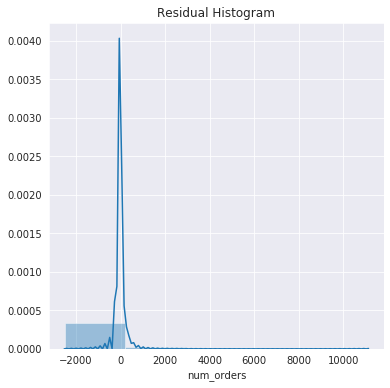



Regression Evaluation Metrices
Train Score: 0.6202783699464438
Test Score: 0.5980673929496566
MAE: 125.98812570673144
MSE: 64030.25542131951
RMSE: 253.04200327479134


In [0]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=5)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', model.score(X_train,y_train))
print('Test Score:', model.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## XGB

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:32:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


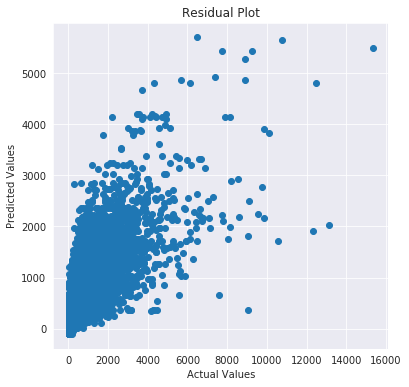

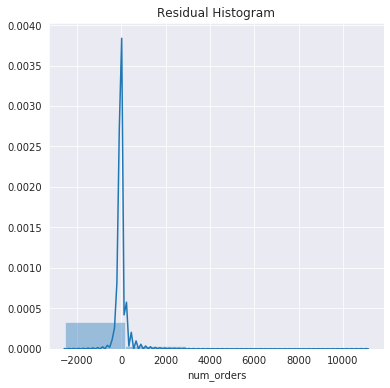



Regression Evaluation Metrices
Train Score: 0.6235950507971335
Test Score: 0.6010299113609219
MAE: 125.33091458098193
MSE: 63558.30861422725
RMSE: 252.10773215874846


In [0]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)
# Residual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
print("\n")
# Residual Histogram
plt.figure(figsize=(6,6))
sns.distplot((y_test-predictions),bins=5)
plt.title('Residual Histogram')
plt.show()
print("\n")
# Error Values
print('Regression Evaluation Metrices')
print('Train Score:', model.score(X_train,y_train))
print('Test Score:', model.score(X_test,y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [0]:
""https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/""